In [1]:
import numpy as np
import os
import random
import shutil
import cv2

import matplotlib.pyplot as plt
from natsort import natsorted
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dataset_path = "data/dataset/"

In [24]:
images = []
labels = []

class_labels = sorted(os.listdir(dataset_path))

num_images_per_label = 5

common_image_size = (224, 224)

for label in class_labels:
    label_dir = os.path.join(dataset_path, label)
    
    image_files = os.listdir(label_dir)
    
    selected_image_files = random.sample(image_files, num_images_per_label)
    
    for image_file in selected_image_files:
        image_path = os.path.join(label_dir, image_file)
        
        image = cv2.imread(image_path)
        image = cv2.resize(image, common_image_size)
        
        images.append(image)
        
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

images, labels = shuffle(images, labels, random_state=42)

In [4]:
images.shape

(75, 224, 224, 3)

In [5]:
def plot_images(images, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))

    if nrows > 1 and ncols > 1:
        axes = axes.ravel()

    for i in range(nrows * ncols):
        ax = axes[i]
        ax.imshow(images[i])
        ax.axis('off')
        ax.set_title(labels[i])

    plt.tight_layout()
    plt.show()

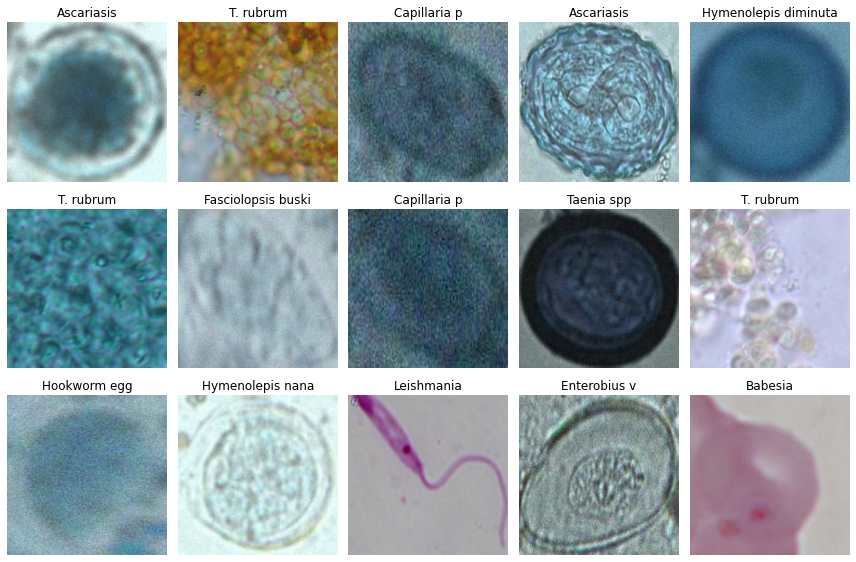

In [6]:
plot_images(images, labels, nrows=3, ncols=5)

In [8]:
weight_images = []

for img in images[:15]:
    weight_image = cv2.addWeighted(img, 1.3, np.zeros(img.shape, img.dtype), 0, 0)
    weight_images.append(weight_image)

weight_images = np.array(weight_images)

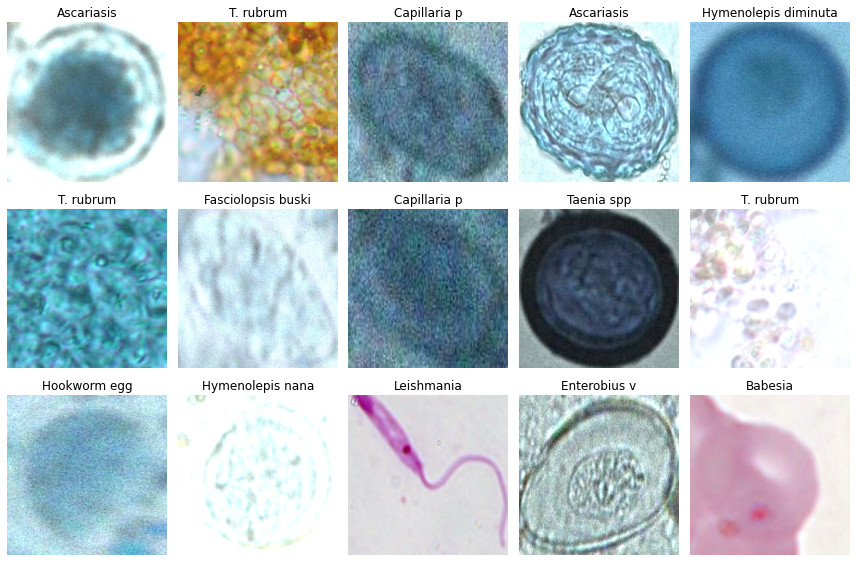

In [9]:
plot_images(weight_images, labels, nrows=3, ncols=5)

In [12]:
images.shape

(75, 224, 224, 3)

In [14]:
image_all=[]
for img in images:
    image_all.append(img)
    # Adaptive Thresholding..
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    thresh1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
    image_all.append(thresh1)

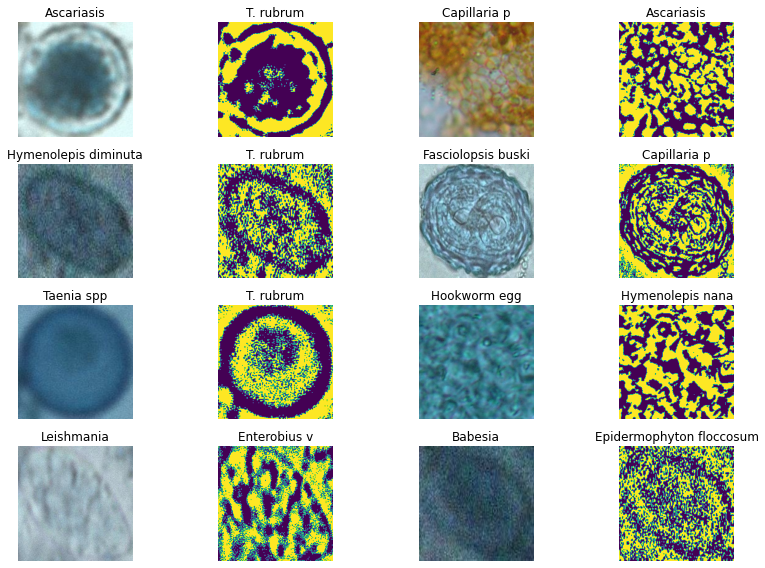

In [15]:
plot_images(image_all[:24], labels, nrows=4, ncols=4)

In [16]:
images_gray=[]
for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    images_gray.append(gray)

In [23]:
images[0].shape

(224, 224)

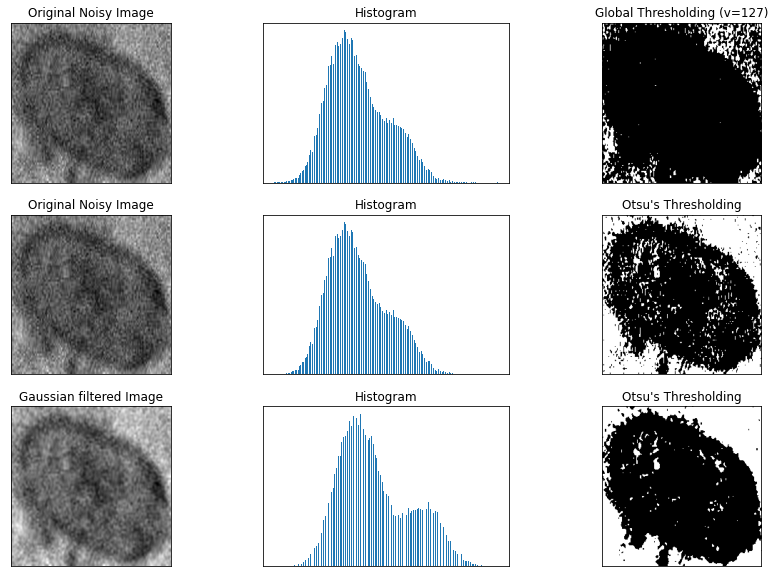

In [20]:
img = images_gray[2]
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(15,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [25]:
image_all = []
img = images[0]
image_all.append(img)
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
# plt.imshow(img2)
# plt.show()
image_all.append(img2)


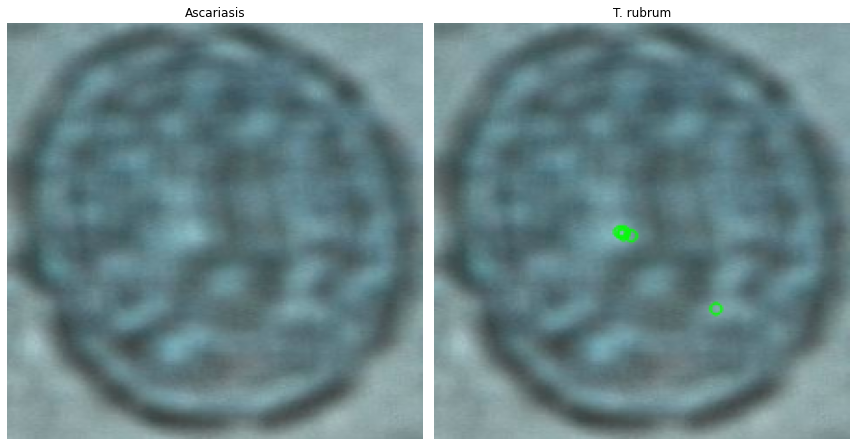

In [26]:
plot_images(image_all, labels, nrows=1, ncols=2)

In [27]:
image_all=[]
for img in images[:16]:
    img_neg = 1 - img
    image_all.append(img_neg)

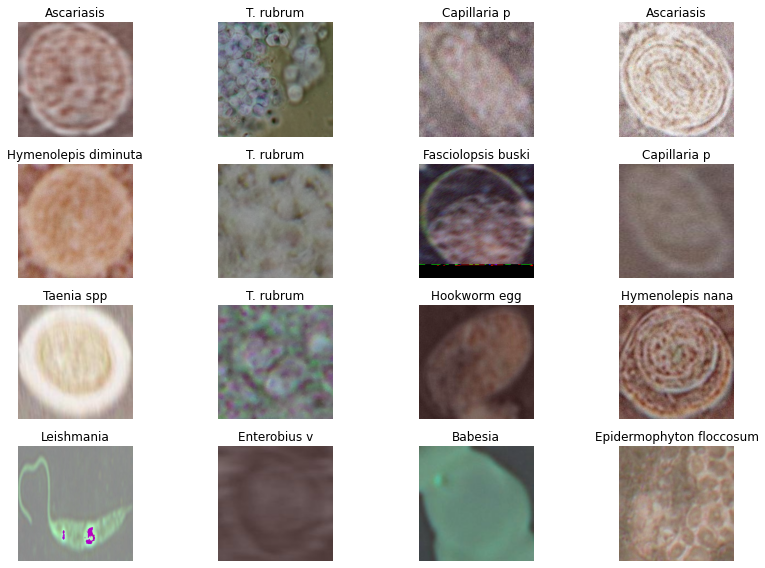

In [28]:
plot_images(image_all, labels, nrows=4, ncols=4)

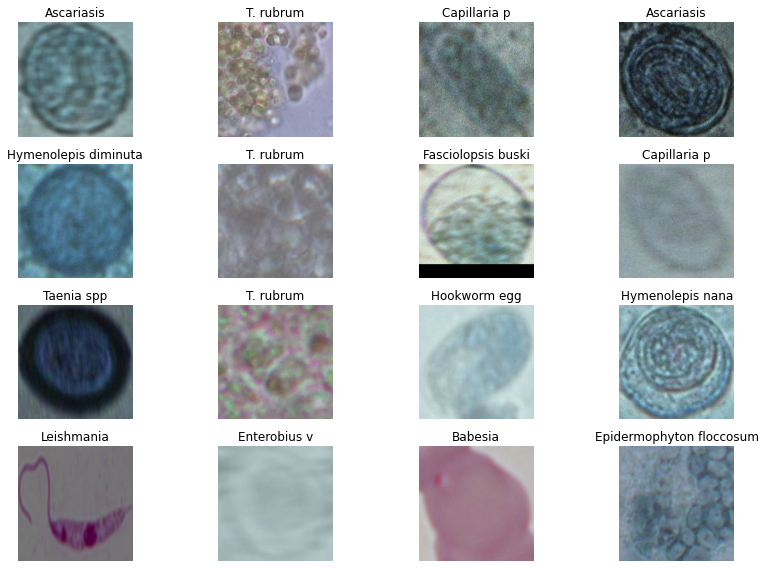

In [29]:
plot_images(images, labels, nrows=4, ncols=4)

In [30]:
image_all=[]
for img in images[:5]:
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(img,kernel,iterations = 1)
    image_all.append(erosion)

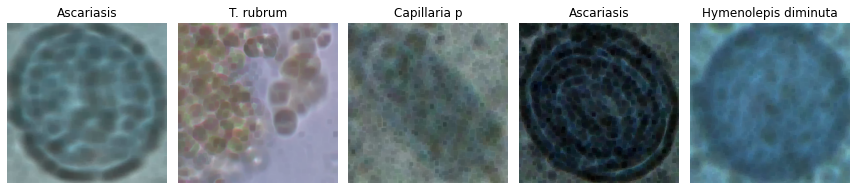

In [31]:
plot_images(image_all, labels, nrows=1, ncols=5)

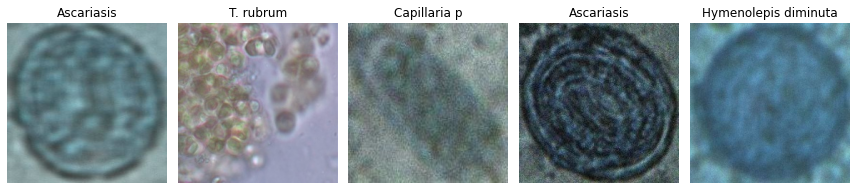

In [32]:
plot_images(images, labels, nrows=1, ncols=5)

In [33]:
image_all=[]
for img in images[:5]:
    kernel = np.ones((5,5),np.uint8)
    dilation = cv2.dilate(img,kernel,iterations = 1)
    image_all.append(dilation)

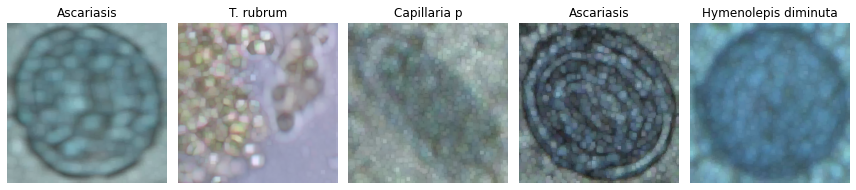

In [34]:
plot_images(image_all, labels, nrows=1, ncols=5)

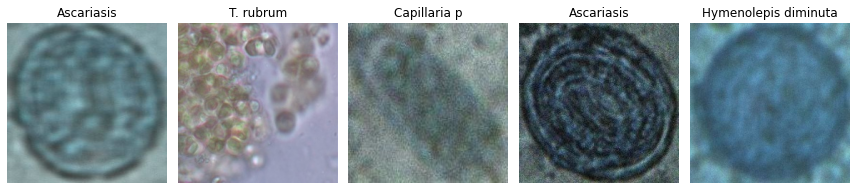

In [35]:
plot_images(images, labels, nrows=1, ncols=5)

In [36]:
image_all=[]
for img in images:
    kernel = np.ones((5,5),np.uint8)
    gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
    image_all.append(gradient)

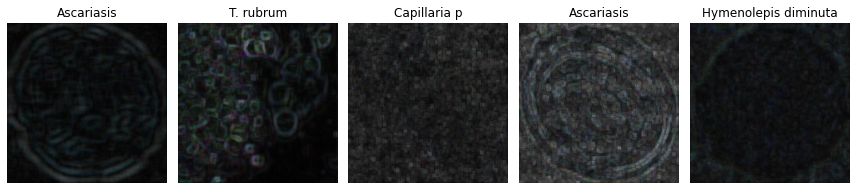

In [37]:
plot_images(image_all, labels, nrows=1, ncols=5)

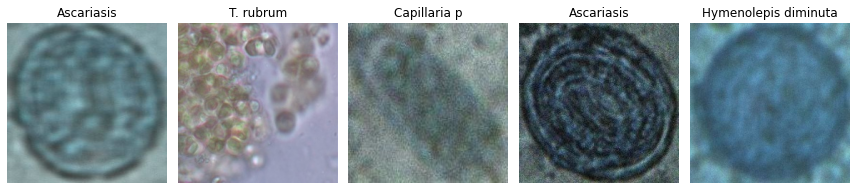

In [38]:
plot_images(images, labels, nrows=1, ncols=5)

In [20]:
def adaptive_threshold(img):
    # Ensure that the image is in grayscale (single-channel)
    if img.shape[-1] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply adaptive thresholding
    thresholded_img = cv2.adaptiveThreshold(
        img, 255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 115, 1
    )
    
    img = cv2.cvtColor(thresholded_img, cv2.COLOR_GRAY2BGR)
    
    return thresholded_img

<class 'numpy.ndarray'>
(224, 224)


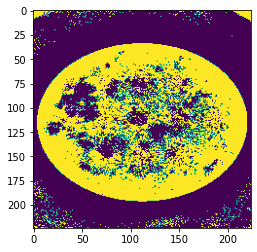

In [21]:
ada = adaptive_threshold(np.array(images[0]))
print(type(ada))
print(ada.shape)
plt.imshow(ada)